In [1]:
from plot import *

# Workload Balancing Techiques

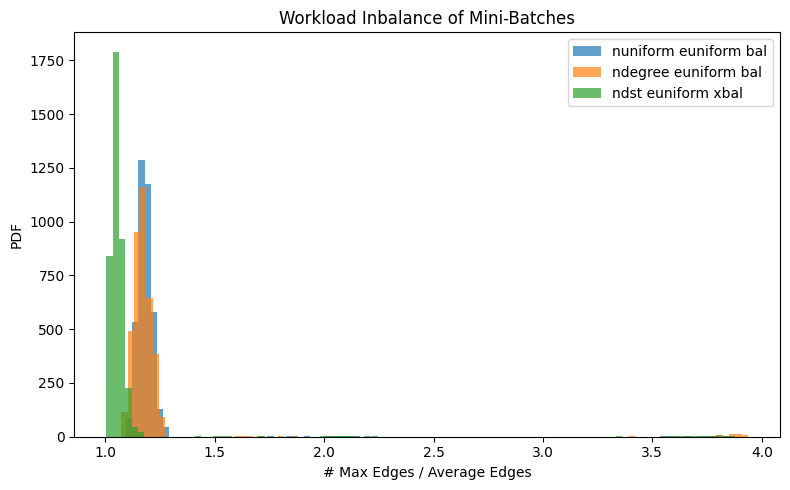

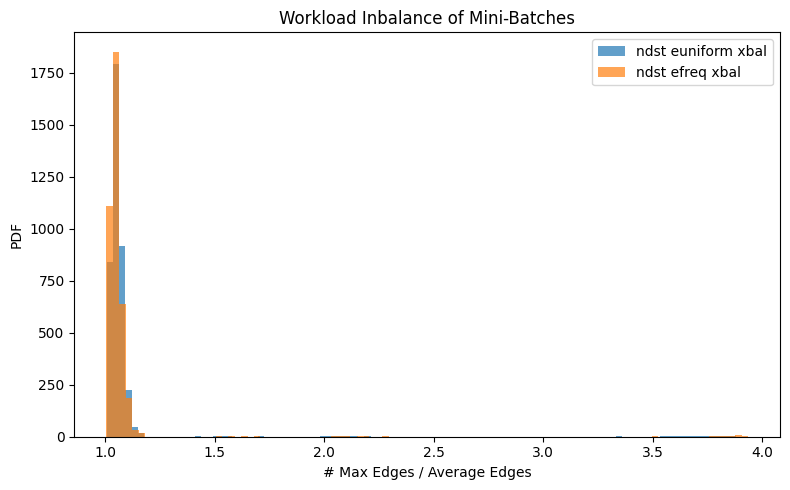

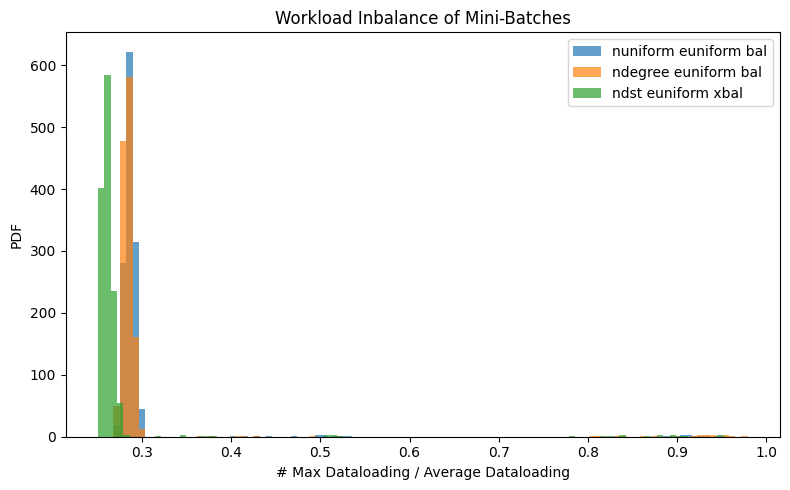

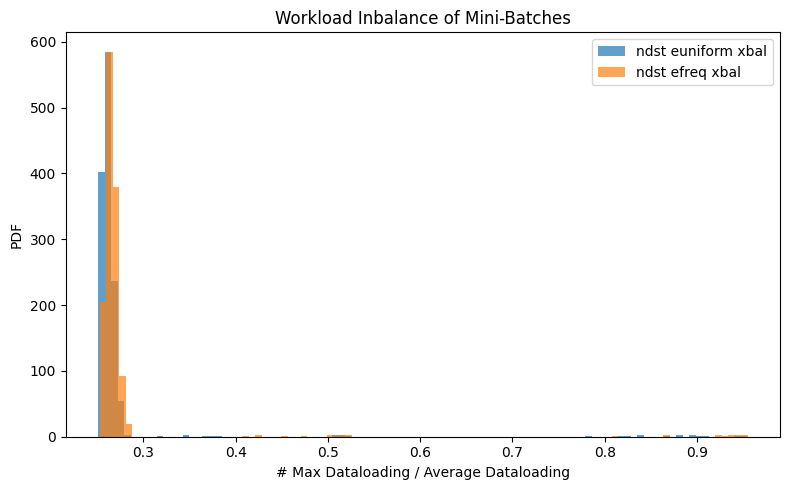

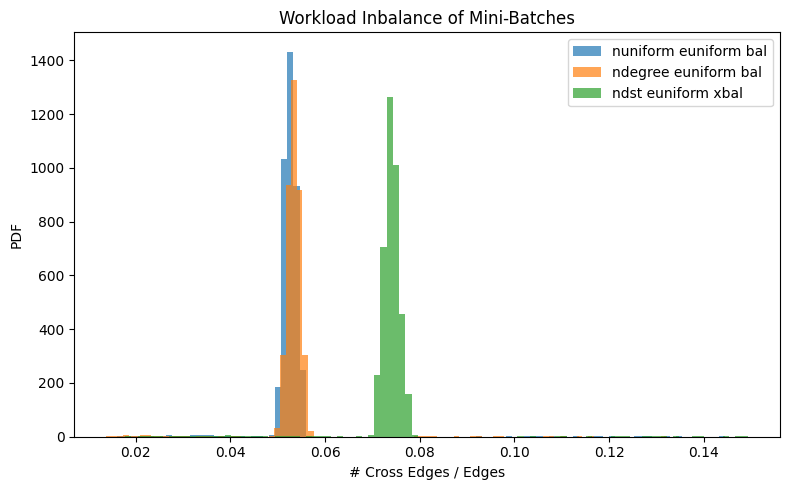

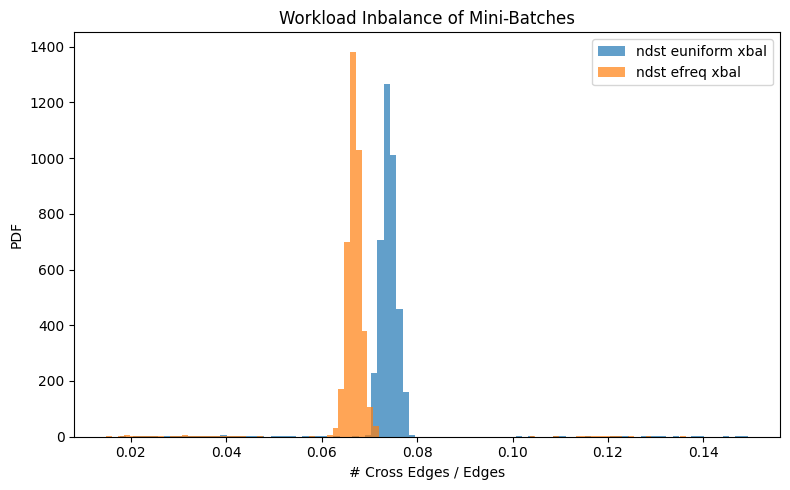

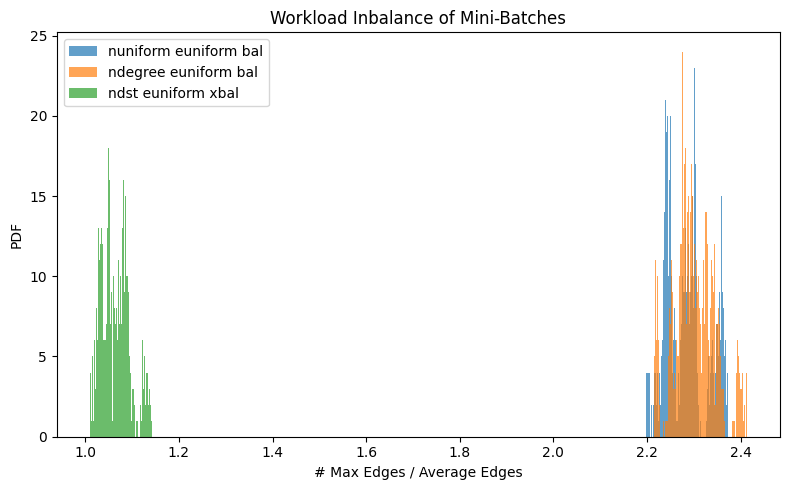

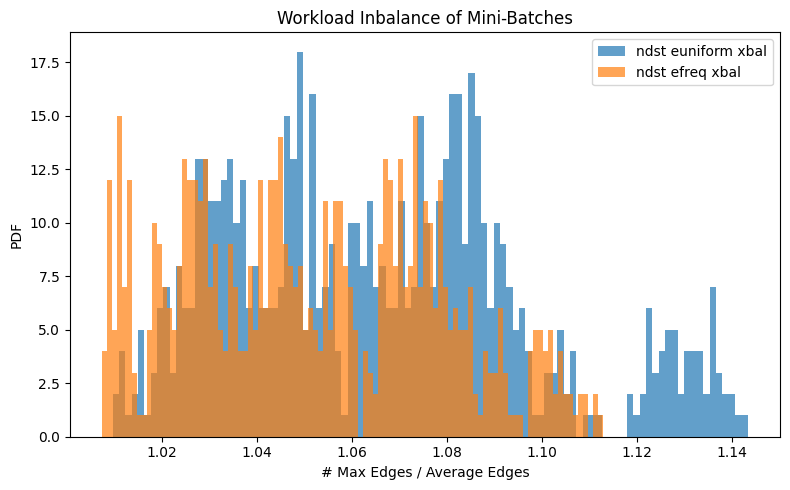

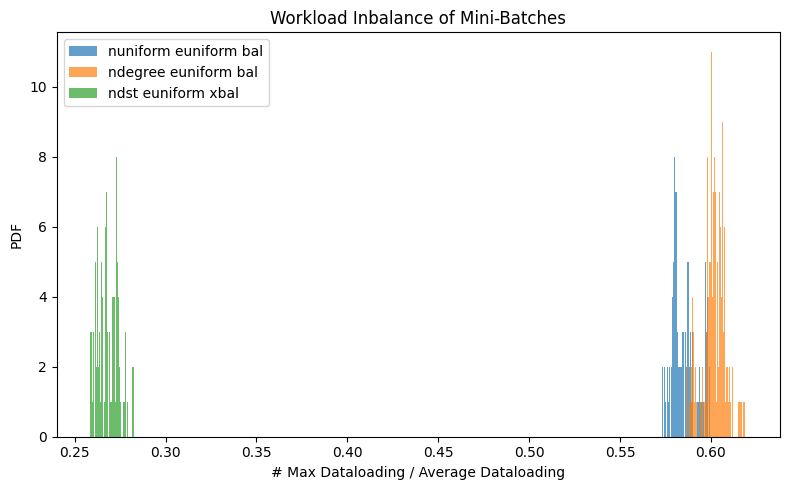

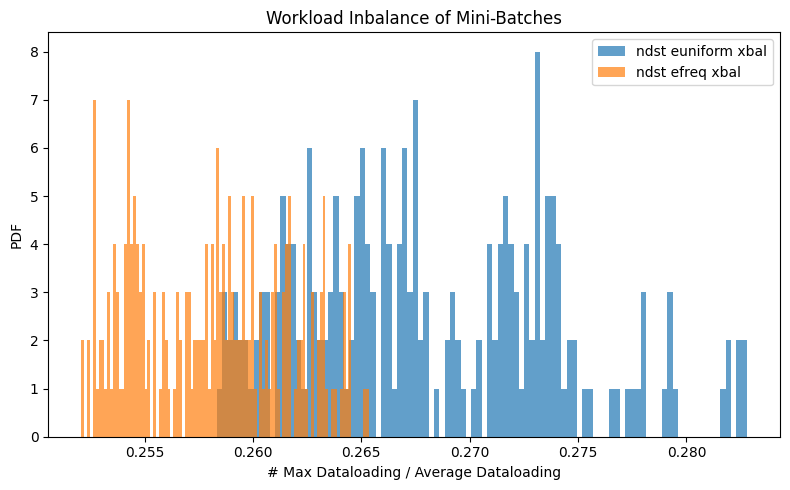

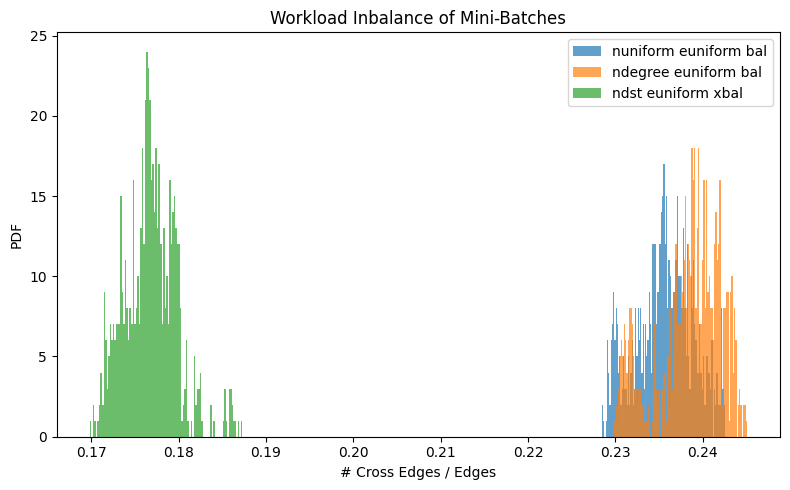

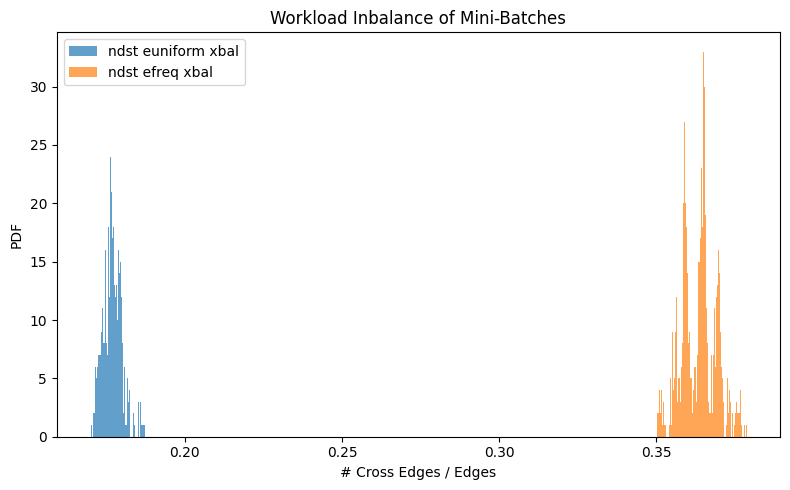

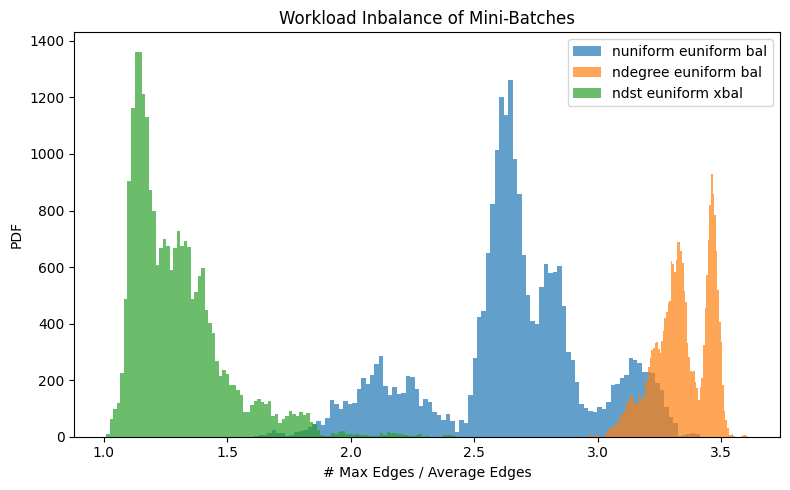

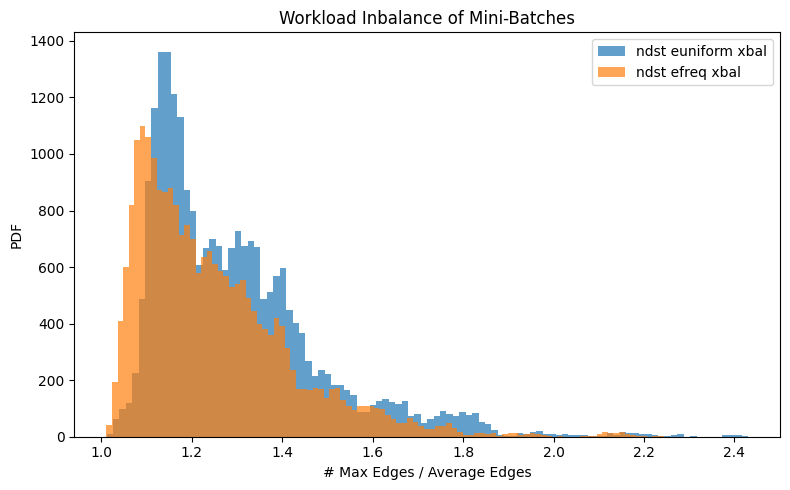

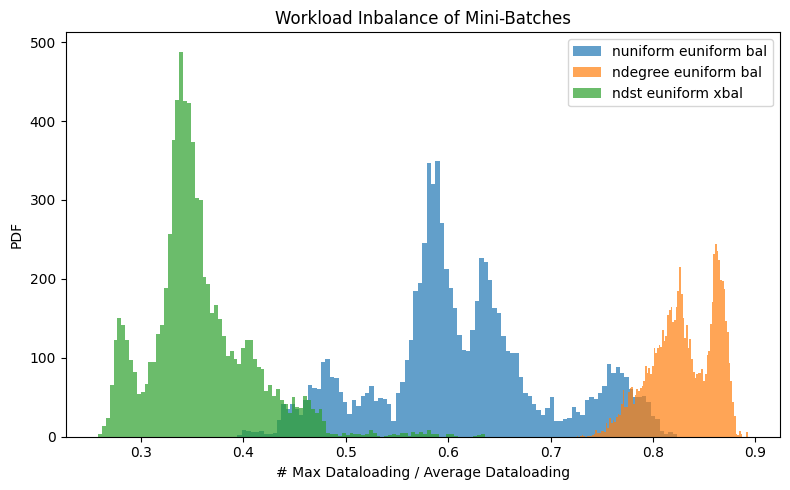

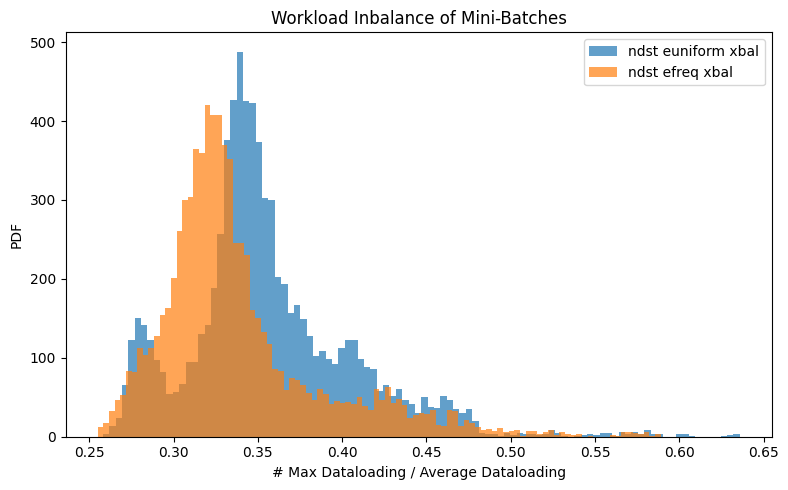

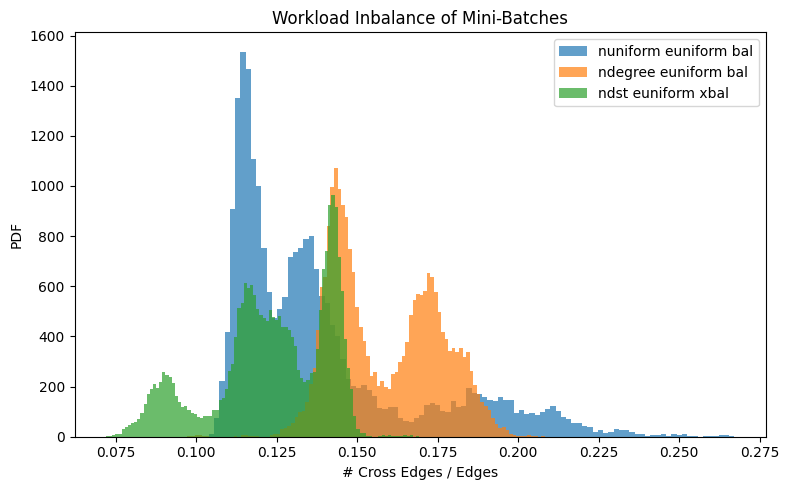

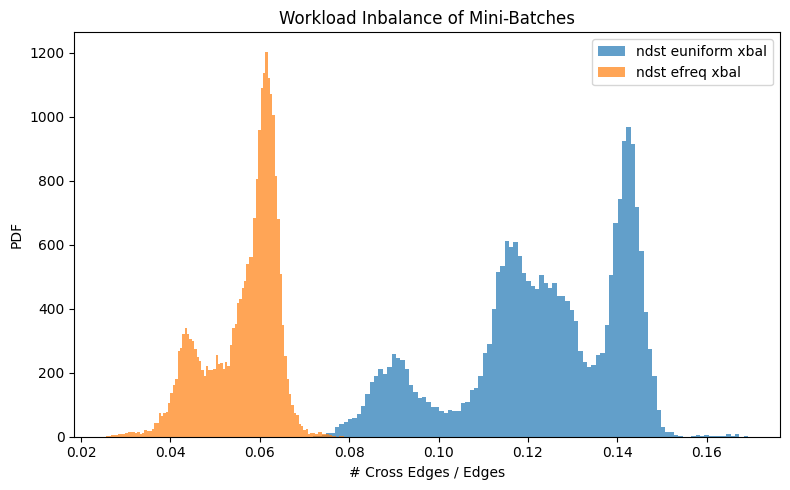

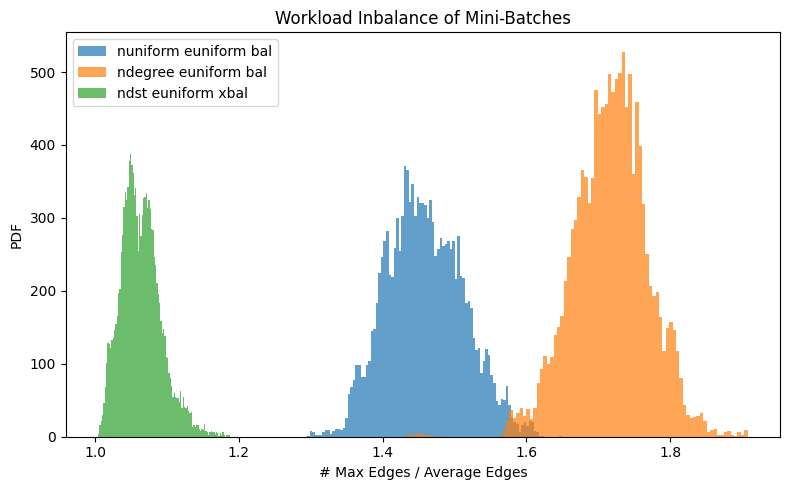

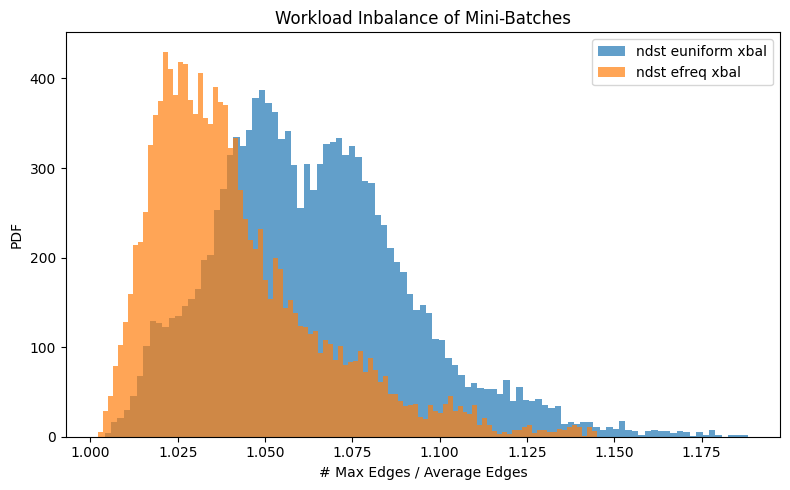

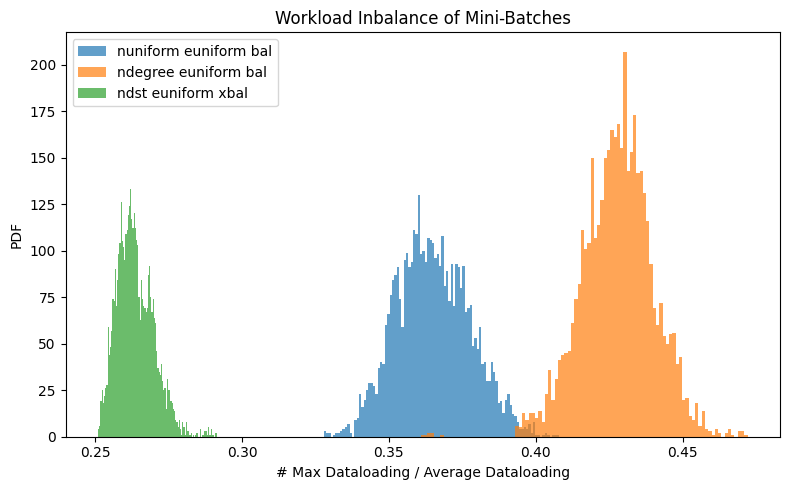

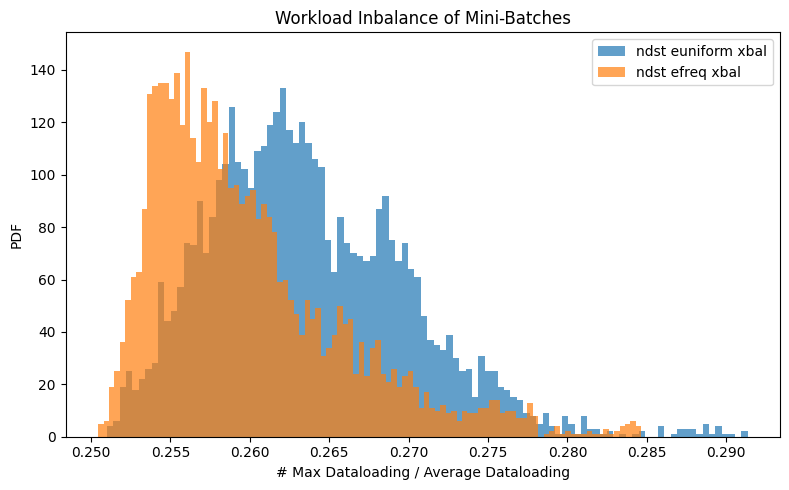

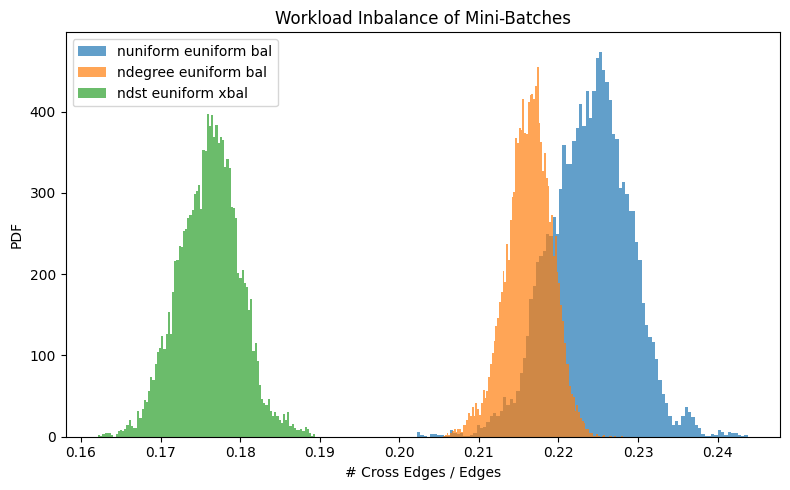

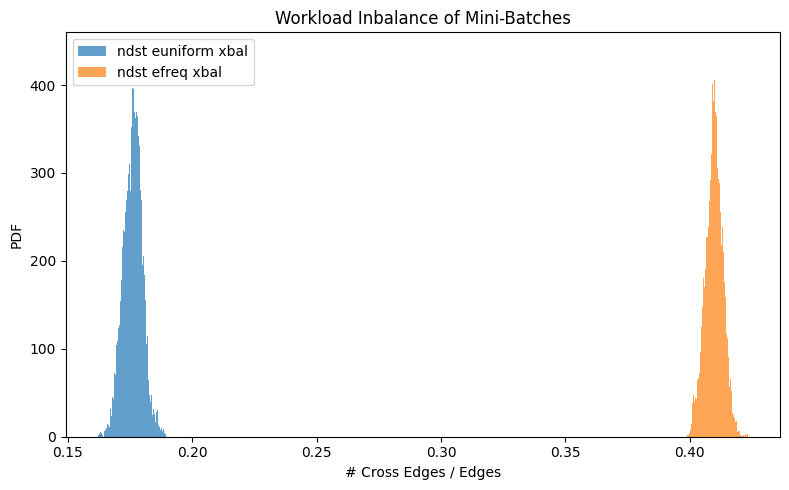

In [2]:
def get_workload_bal(graph_name, data_dir):
    name2work = {}
    pcfgs = []

    #baseline
    for node_mode in ["uniform", "degree"]:
        pcfg = ParConfig(node_mode=node_mode, edge_mode="uniform", bal="bal")
        pcfgs.append(pcfg)

    #freq based workload balancing
    for node_mode in ["dst"]:
        for edge_mode in ["uniform"]:
            for bal in ["xbal"]:
                pcfg = ParConfig(node_mode=node_mode, edge_mode=edge_mode, bal=bal)
                pcfgs.append(pcfg)

    for pcfg in pcfgs:
        workload = load_workload(graph_name, data_dir, pcfg)
        name2work[pcfg.name()] = workload
    return name2work

def get_workload_comm(graph_name, data_dir):
    name2work = {}
    pcfgs = []
    # for node_mode in ["dst", "src", "input"]:

    for node_mode in ["dst"]:
        for edge_mode in ["uniform", "freq"]:
            for bal in ["xbal"]:
                pcfg = ParConfig(node_mode=node_mode, edge_mode=edge_mode, bal=bal)
                pcfgs.append(pcfg)

    for pcfg in pcfgs:
        workload = load_workload(graph_name, data_dir, pcfg)
        name2work[pcfg.name()] = workload
    return name2work
data_dir = "/data/juelin/dataset/gsplit"
for graph_name in ["products", "orkut", "papers100M", "friendster"]:
    name2work_bal = get_workload_bal(graph_name, data_dir)
    name2work_comm = get_workload_comm(graph_name, data_dir)
    for plot_mode in ["edge", "input", "crs"]:
        plots(name2work_bal, plot_mode, f"plots/{graph_name}_{plot_mode}_bal.png")
        plots(name2work_comm, plot_mode, f"plots/{graph_name}_{plot_mode}_com.png")


# Communication Reduction

In [ ]:
name2work = {}
data_dir = "/data/juelin/dataset/gsplit"
pcfgs = []

# #baseline
# for node_mode in ["uniform", "degree"]:
#     pcfg = ParConfig(node_mode=node_mode, edge_mode="uniform", bal="bal")
#     pcfgs.append(pcfg)

#freq based workload balancing
for node_mode in ["dst", "src", "input"]:
    for edge_mode in ["uniform", "freq"]:
        for bal in ["xbal"]:
            pcfg = ParConfig(node_mode=node_mode, edge_mode=edge_mode, bal=bal)
            pcfgs.append(pcfg)

for graph_name in ["papers100M"]:
    for pcfg in pcfgs:
        print(pcfg)
        workload = load_workload(graph_name, data_dir, pcfg)
        name2work[pcfg.name()] = workload

for plot_mode in ["edge", "input", "crs"]:
    plots(name2work, plot_mode)
    

In [ ]:
plots(name2work, "input")

In [ ]:
plots(name2work, "crs")